In [1]:
%matplotlib inline

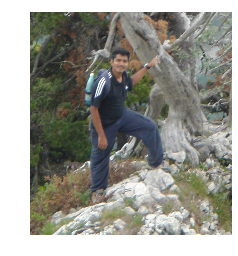

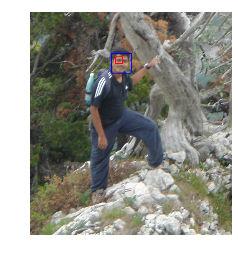

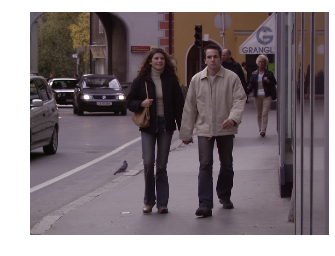

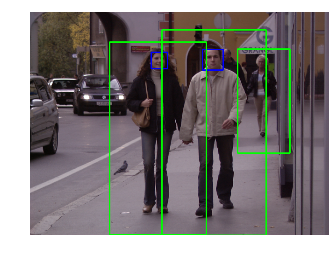

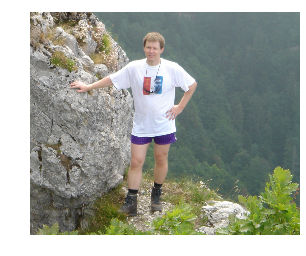

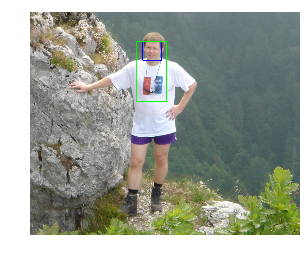

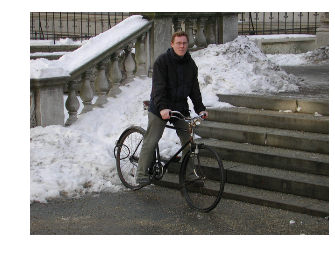

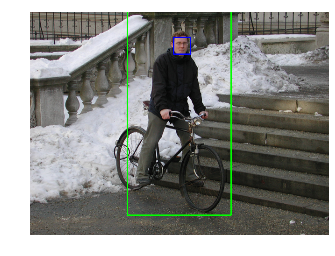

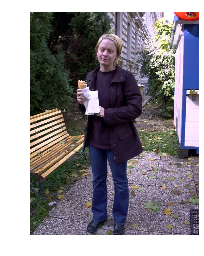

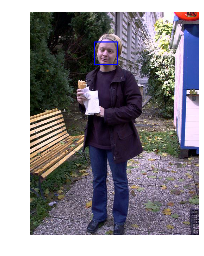

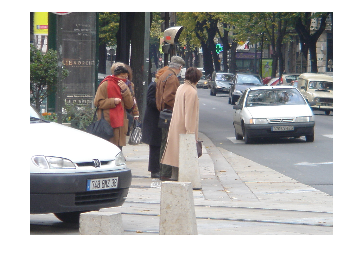

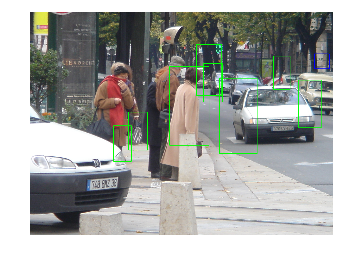

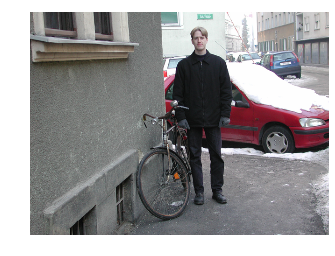

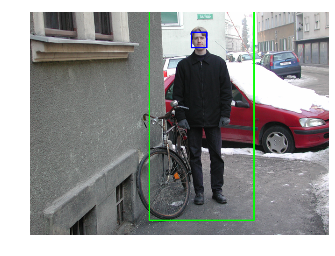

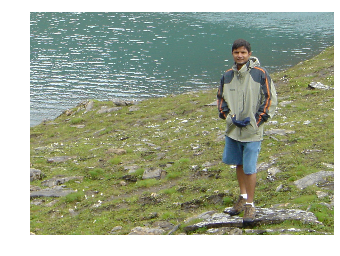

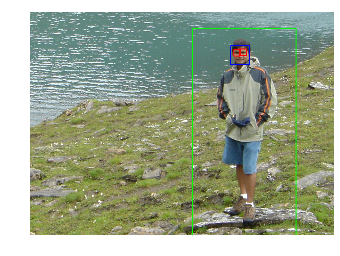

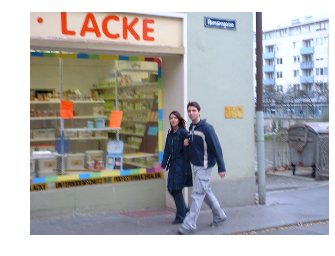

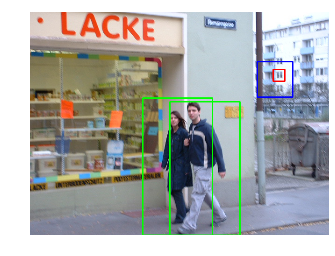

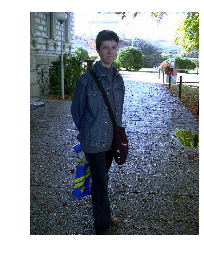

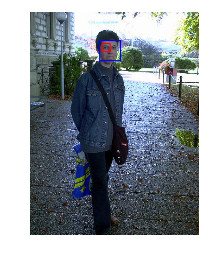

In [6]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

mypath = "/notebooks/INRIAPerson/Test/pos/"
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())


onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

cnt = 0
for filename in onlyfiles:
    img = cv2.imread(filename)
    orig = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        continue
    for (x,y,w,h) in faces:
         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
         roi_gray = gray[y:y+h, x:x+w]
         roi_color = img[y:y+h, x:x+w]
         eyes = eye_cascade.detectMultiScale(roi_gray)
         for (ex,ey,ew,eh) in eyes:
             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
            
    # detect people in the image
    (rects, weights) = hog.detectMultiScale(img, winStride=(4, 4),
    padding=(8, 8), scale=1.05)

    # apply non-maxima suppression to the bounding boxes using a
    # fairly large overlap threshold to try to maintain overlapping
    # boxes that are still people
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

    # draw the final bounding boxes
    for (xA, yA, xB, yB) in pick:
        cv2.rectangle(img, (xA, yA), (xB, yB), (0, 255, 0), 2)

    
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cnt = cnt + 1
    if cnt == 10:
        break